In [29]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

In [30]:
# Creating a dataset
X_numpy, y_numpy = make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [31]:
# Training set as Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
# Target set as Tensor
y = torch.from_numpy(y_numpy.astype(np.float32))

In [32]:
# Reshaping the Tensor y
y = y.view(y.shape[0], 1)

In [34]:
y.dtype, X.dtype

(torch.float32, torch.float32)

In [5]:
# Sample size and the nnumber of features
n_samples, n_features = X.shape

In [6]:
input_size = n_features
output_size = 1 # Target varible/feature size

# creates an instance of the nn.Linea which is nothing but Linear Regression
model = nn.Linear(input_size, output_size) 

In [7]:
# Setting learning rate (alpha) 
learning_rate = 0.01

# Loss function as MSE for regression task
criterion = nn.MSELoss()

# creates an instance of the stochastic gradient descent (SGD) optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

epoch: 10, loss = 4360.5356
epoch: 20, loss = 3255.1062
epoch: 30, loss = 2454.8708
epoch: 40, loss = 1874.9723
epoch: 50, loss = 1454.3417
epoch: 60, loss = 1148.9679
epoch: 70, loss = 927.0892
epoch: 80, loss = 765.7556
epoch: 90, loss = 648.3654
epoch: 100, loss = 562.8956


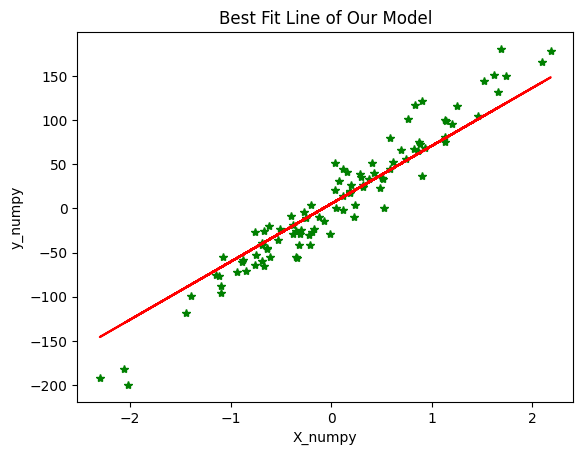

In [8]:
n_iters = 100
for epoch in range(n_iters):
    
    # Forward pass 
    y_pred = model(X)
    
    # Loss calculation
    loss = criterion(y_pred, y)
    
    # Backward pass and updating the weights
    loss.backward()
    optimizer.step()

    # Making the optimizer zero gradient before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'g*')
plt.plot(X_numpy, predicted, 'r')
plt.title('Best Fit Line of Our Model')
plt.xlabel('X_numpy')
plt.ylabel('y_numpy')
plt.show()

In [9]:
X_test = torch.tensor([1], dtype=torch.float32)  # Convert to Float data type
yy = model(X_test)
yy

tensor([70.8819], grad_fn=<AddBackward0>)

## Try with another dataset

In [37]:
import pandas as pd

#Importing the Dataset
df = pd.read_csv("data/Rent.csv", sep=';')
df.head() 

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [38]:
df.shape

(60, 2)

In [39]:
X = df.drop('rent', axis =1)
y = df[['rent']]


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Convert DataFrame columns to NumPy arrays
X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))

In [41]:
# Reshaping the Tensor y
y = y.view(y.shape[0], 1)

In [42]:
# Sample size and the nnumber of features
n_samples, n_features = X.shape

In [43]:
input_size = n_features # As we have only one feature varible
output_size = 1 

# Creates an instance of the nn.Linea which is nothing but Linear Regression
model2 = nn.Linear(input_size, output_size) 

In [44]:
# Setting learning rate (alpha) 
learning_rate = 0.01

# Loss function as MSE for regression task
criterion = nn.MSELoss()

# creates an instance of the stochastic gradient descent (SGD) optimizer
optimizer = torch.optim.SGD(model2.parameters(), lr = learning_rate)  

epoch: 10, loss = 0.0816
epoch: 20, loss = 0.0710
epoch: 30, loss = 0.0640
epoch: 40, loss = 0.0592
epoch: 50, loss = 0.0561
epoch: 60, loss = 0.0540
epoch: 70, loss = 0.0526
epoch: 80, loss = 0.0516
epoch: 90, loss = 0.0510
epoch: 100, loss = 0.0506


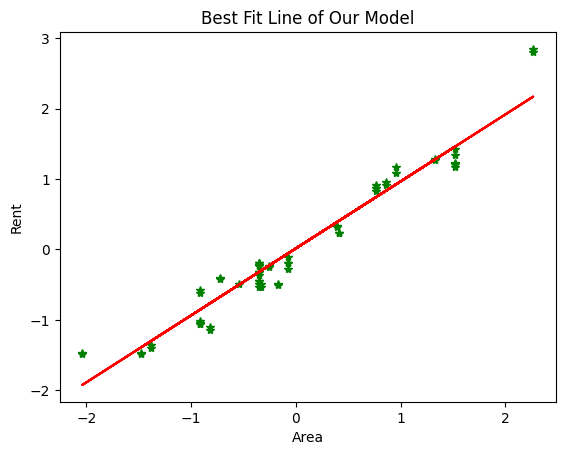

In [46]:
n_iters = 100
for epoch in range(n_iters):
    
    # Forward pass
    y_pred = model2(X)
    
    # Loss calculation
    loss = criterion (y_pred, y)
    
    # Backward pass and updating the weights
    loss.backward()
    optimizer.step()

    # Making the optimizer zero gradient before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model2(X).detach().numpy()

plt.plot(X, y, 'g*')
plt.plot(X, predicted, 'r')
plt.title('Best Fit Line of Our Model')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.show()